## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading Dataset

In [33]:
df = pd.read_csv('C:/Users/ahmed/vgsales.csv') # Reading Data

In [3]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


## Data Analyzation

In [4]:
np.where(df.applymap(lambda x: x == '')) # Searching Empty Space

(array([], dtype=int64), array([], dtype=int64))

In [5]:
df.shape # Shape of Data

(16598, 11)

In [6]:
df.info

<bound method DataFrame.info of         Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sal

In [7]:
df.dtypes # Data Types

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

### Cleaning and Imputation

In [8]:
df.isna().sum() # Searching number of NAN values in each coloumn

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
df['Year'].mean() # Mean

2006.4064433147546

In [10]:
df['Year'].mode() # Mode

0    2009.0
dtype: float64

In [11]:
df['Year'].median() # Median

2007.0

Mean is very close to median and mode which suggest symmetrical distribution of data.

In [12]:
year_mean = df['Year'].mean() 

df['Year'] = df['Year'].replace(np.nan,year_mean) # Replacing NAN with mean

In [13]:
df.isna().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [14]:
df['Publisher'].mode()

0    Electronic Arts
dtype: object

In [15]:
df['Publisher']=df['Publisher'].replace(np.nan,'Electronic Arts') # Replacing NAN with mean

In [16]:
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

## Data Visualization

### Game with highest Count (NFS)

In [17]:
df.describe(include=object)

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16598
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1409


In [18]:
nfs_sale = df.loc[df['Name']=='Need for Speed: Most Wanted','NA_Sales':'Other_Sales'].sum()   # Dataframe with only NFS

### Sale of NFS Most Wanted

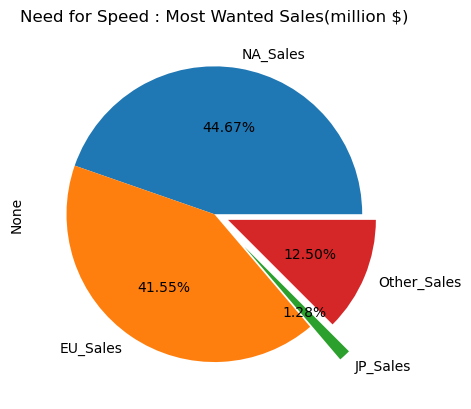

In [19]:
plt.style.use('default')

nfs_sale.plot(kind='pie',title='Need for Speed : Most Wanted Sales(million $)',explode=(0,0,0.3,0.1), autopct='%1.2f%%')
plt.show()


## Games with Highest Sales in the World

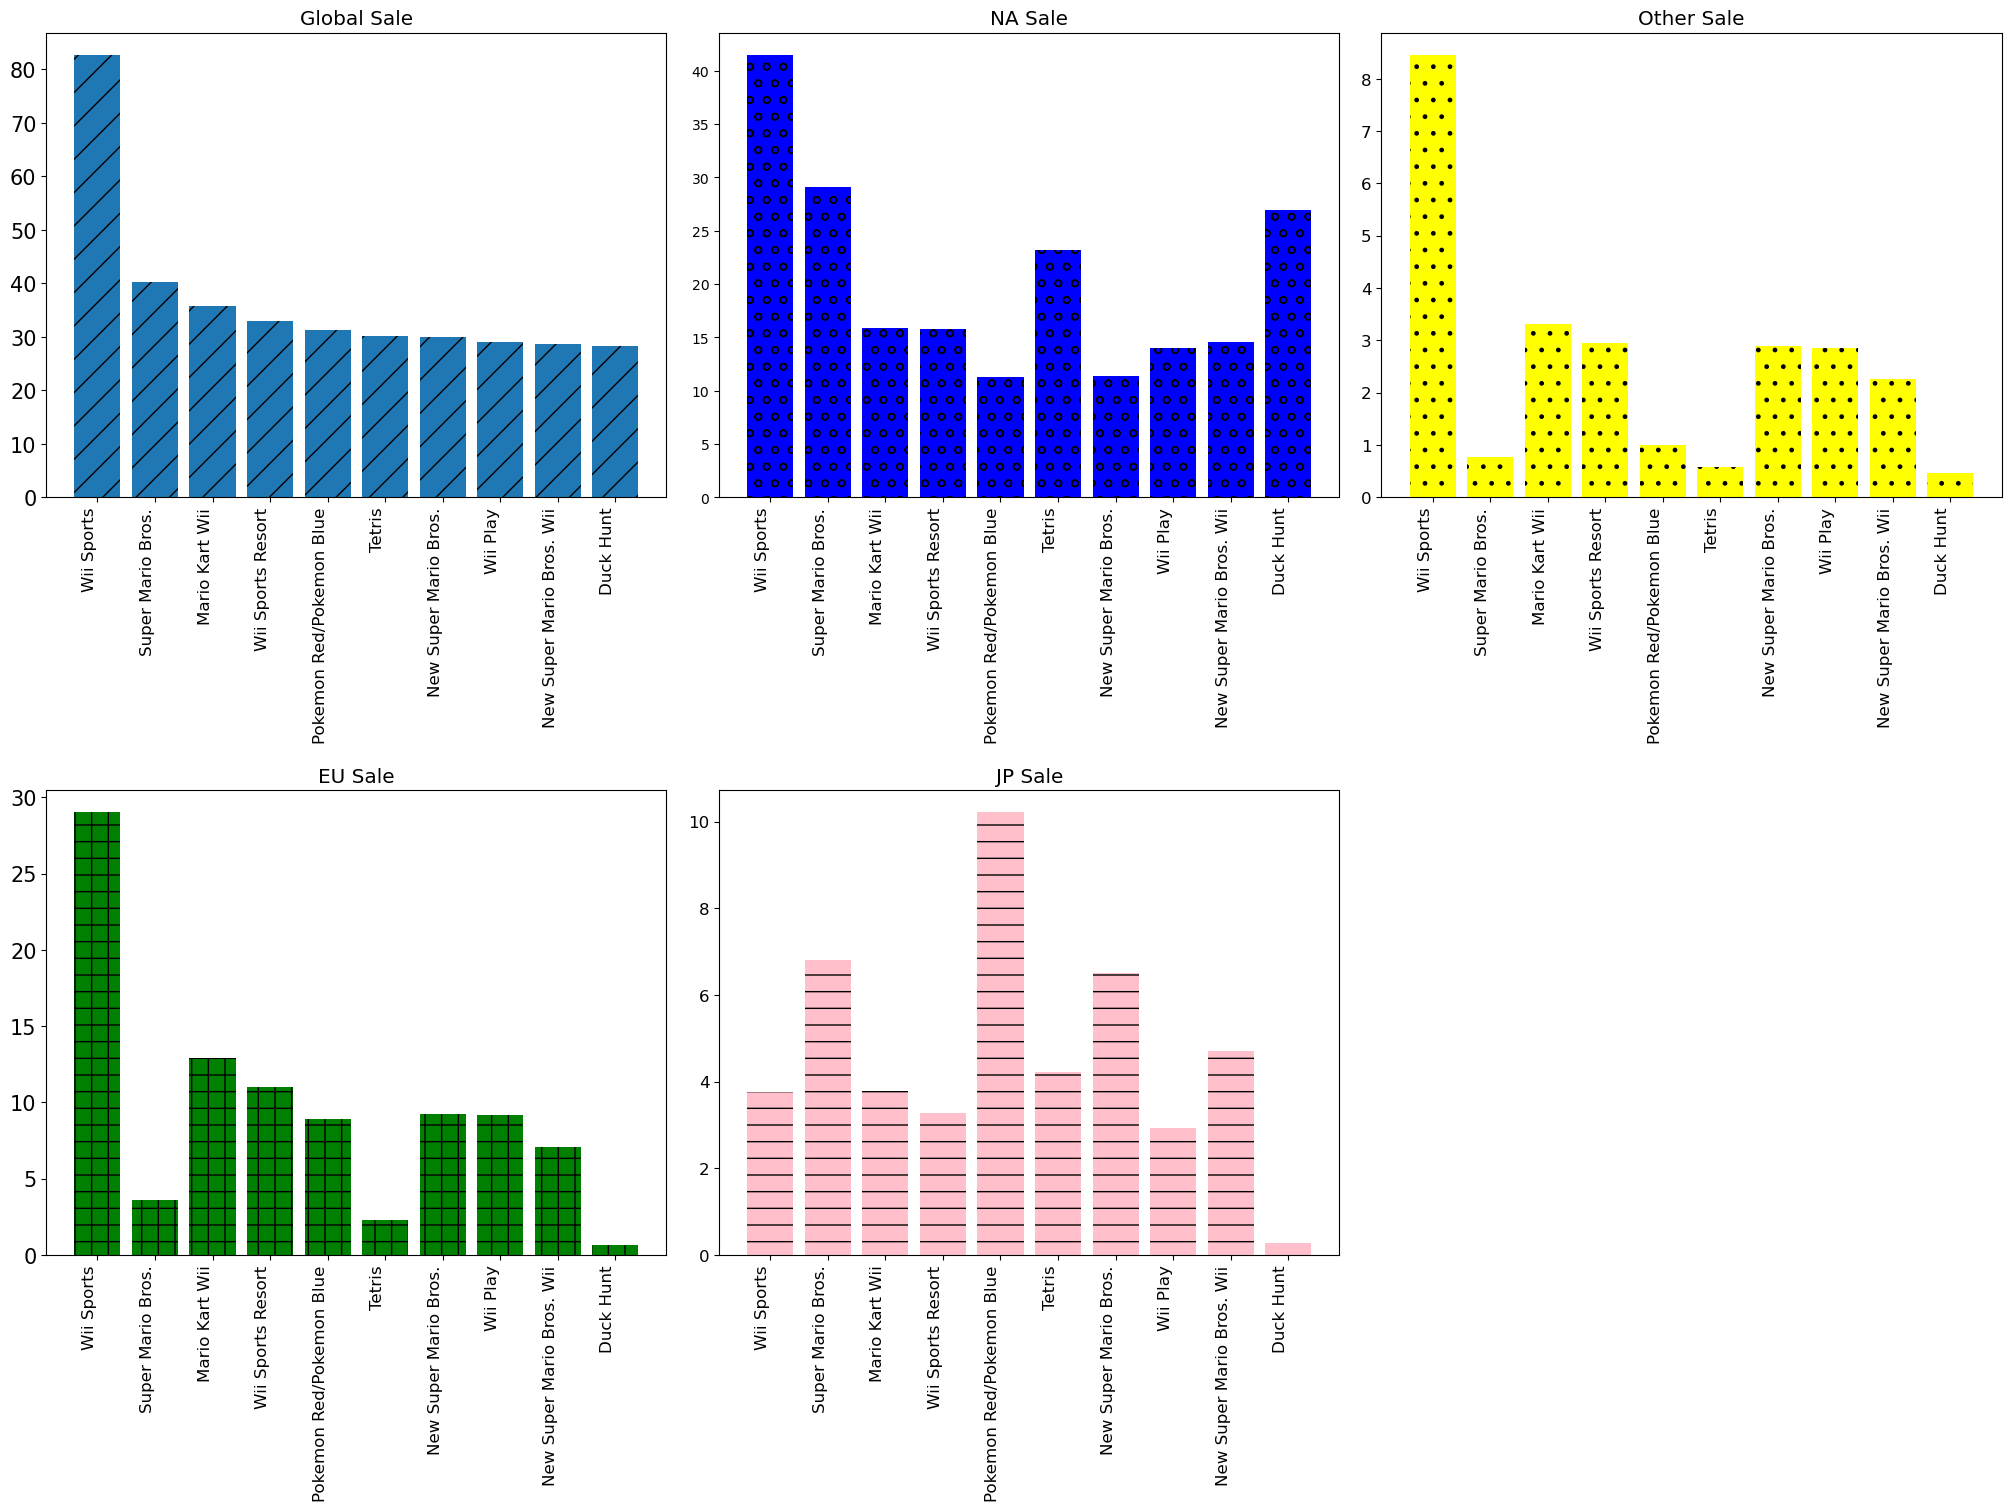

In [20]:
high_sale_game = df.head(10)

# Creating figure and subplots
fig, axs = plt.subplots(2, 3,figsize=(20,15),constrained_layout=True)
plt.style.use('ggplot')

# Barchart of highest selling games globally
axs[0, 0].bar(high_sale_game['Name'],high_sale_game['Global_Sales'],hatch='/')
axs[0, 0].set_title('Global Sale')
axs[0, 0].set_xticklabels(high_sale_game['Name'],rotation=90, ha='right')
axs[0, 0].tick_params(axis='x', which='major', labelsize=12)
axs[0, 0].tick_params(axis='y', which='major', labelsize=15)

# Barchart of highest selling games in NA
axs[0, 1].bar(high_sale_game['Name'],high_sale_game['NA_Sales'],color='Blue',hatch='o')
axs[0, 1].set_title('NA Sale')
axs[0, 1].set_xticklabels(high_sale_game['Name'],rotation=90, ha='right')
axs[0, 1].tick_params(axis='x', which='major', labelsize=12)

# Barchart of highest selling games in other part of the World
axs[0, 2].bar(high_sale_game['Name'],high_sale_game['Other_Sales'],color='Yellow',hatch='.')
axs[0, 2].set_title('Other Sale')
axs[0, 2].set_xticklabels(high_sale_game['Name'],rotation=90, ha='right')
axs[0, 2].tick_params(axis='both', which='major', labelsize=12)

# Barchart of highest selling games in EU
axs[1, 0].bar(high_sale_game['Name'],high_sale_game['EU_Sales'],color='Green',hatch='+')
axs[1, 0].set_title('EU Sale')
axs[1, 0].set_xticklabels(high_sale_game['Name'],rotation=90, ha='right')
axs[1, 0].tick_params(axis='x', which='major', labelsize=12)
axs[1, 0].tick_params(axis='y', which='major', labelsize=15)

# Barchart of highest selling games Japan
axs[1, 1].bar(high_sale_game['Name'],high_sale_game['JP_Sales'],color='Pink',hatch='-')
axs[1, 1].set_title('JP Sale')
axs[1, 1].set_xticklabels(high_sale_game['Name'],rotation=90, ha='right')
axs[1, 1].tick_params(axis='both', which='major', labelsize=12)

# Removing empty subplot
axs[1, 2].set_visible(False)


## Highest Grossing Genre Across Different Parts Of World

In [21]:
genre_sales = df.groupby(['Genre']).sum() # Grouping data to get highest grossing Genre

In [22]:
genre_sales['Genre']=genre_sales.index
genre_sales


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre
Genre,,,,,,,,
Action,26441383,6.658135e+06,877.83,525.00,159.95,187.38,1751.18,Action
Adventure,14831165,2.582439e+06,105.80,64.13,52.07,16.81,239.04,Adventure
Fighting,6484242,1.699948e+06,223.59,101.32,87.35,36.68,448.91,Fighting
Misc,14889052,3.490598e+06,410.24,215.98,107.76,75.32,809.96,Misc
Platform,6137545,1.775411e+06,447.05,201.63,130.77,51.59,831.37,Platform
Puzzle,5603136,1.167064e+06,123.78,50.78,57.31,12.55,244.95,Puzzle
Racing,9943933,2.504081e+06,359.42,238.39,56.69,77.27,732.04,Racing
Role-Playing,12032228,2.986488e+06,327.28,188.06,352.31,59.61,927.37,Role-Playing
Shooter,9653872,2.627767e+06,582.60,313.27,38.28,102.69,1037.37,Shooter


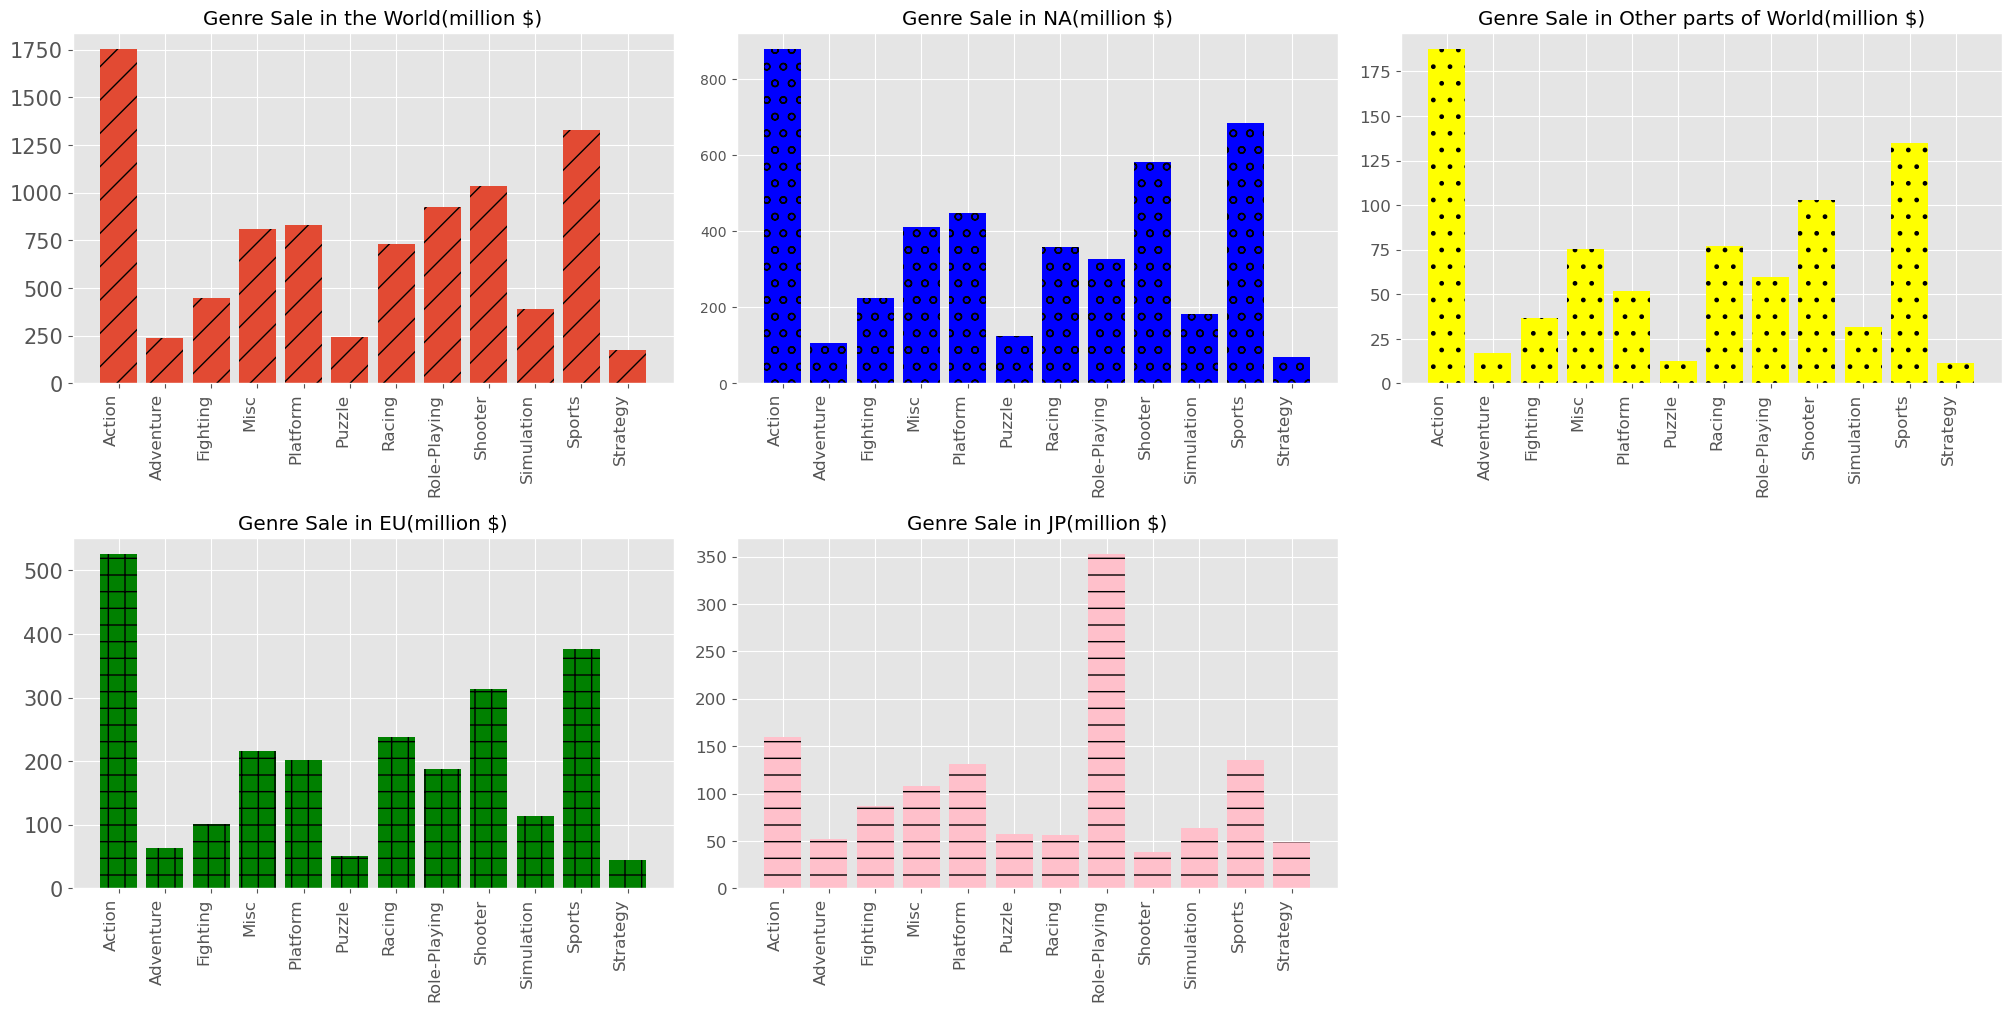

In [23]:
fig, axs = plt.subplots(2, 3,figsize=(20,10),constrained_layout=True)


axs[0, 0].bar(genre_sales['Genre'],genre_sales['Global_Sales'],hatch='/')
axs[0, 0].set_title('Genre Sale in the World(million $)')
axs[0, 0].set_xticklabels(genre_sales['Genre'],rotation=90, ha='right')
axs[0, 0].tick_params(axis='x', which='major', labelsize=12)
axs[0, 0].tick_params(axis='y', which='major', labelsize=15)

axs[0, 1].bar(genre_sales['Genre'],genre_sales['NA_Sales'],hatch='o',color='Blue')
axs[0, 1].set_title('Genre Sale in NA(million $)')
axs[0, 1].set_xticklabels(genre_sales['Genre'],rotation=90, ha='right')
axs[0, 1].tick_params(axis='x', which='major', labelsize=12)

axs[0, 2].bar(genre_sales['Genre'],genre_sales['Other_Sales'],hatch='.',color='Yellow')
axs[0, 2].set_title('Genre Sale in Other parts of World(million $)')
axs[0, 2].set_xticklabels(genre_sales['Genre'],rotation=90, ha='right')
axs[0, 2].tick_params(axis='both', which='major', labelsize=12)

axs[1, 0].bar(genre_sales['Genre'],genre_sales['EU_Sales'],hatch='+',color='Green')
axs[1, 0].set_title('Genre Sale in EU(million $)')
axs[1, 0].set_xticklabels(genre_sales['Genre'],rotation=90, ha='right')
axs[1, 0].tick_params(axis='x', which='major', labelsize=12)
axs[1, 0].tick_params(axis='y', which='major', labelsize=15)

axs[1, 1].bar(genre_sales['Genre'],genre_sales['JP_Sales'],hatch='-',color='Pink')
axs[1, 1].set_title('Genre Sale in JP(million $)')
axs[1, 1].set_xticklabels(genre_sales['Genre'],rotation=90, ha='right')
axs[1, 1].tick_params(axis='both', which='major', labelsize=12)

axs[1, 2].set_visible(False)

## Top Ten Highest Earning Publishers

In [24]:
# Sum of publishers' Sales
pub_sale = df.groupby(['Publisher']).sum()

# Sorting Value in the Descending order
pub_sale.sort_values('Global_Sales',ascending=False,inplace=True)
pub_sale_highest= pub_sale.head(10)
pub_sale_highest['Publisher']=pub_sale_highest.index
pub_sale_highest

<ipython-input-24-40add09ec99d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pub_sale_highest['Publisher']=pub_sale_highest.index


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Publisher
Publisher,,,,,,,,
Nintendo,2714164,1.408711e+06,816.87,418.74,455.42,95.33,1786.56,Nintendo
Electronic Arts,7727829,2.827025e+06,603.61,375.95,14.97,130.44,1125.20,Electronic Arts
Activision,6368325,1.957037e+06,429.70,215.53,6.54,75.34,727.46,Activision
Sony Computer Entertainment,4105604,1.369040e+06,265.22,187.72,74.10,80.45,607.50,Sony Computer Entertainment
Ubisoft,6964728,1.849213e+06,253.43,163.32,7.50,50.26,474.72,Ubisoft
Take-Two Interactive,2622275,8.293504e+05,220.49,118.14,5.83,55.24,399.54,Take-Two Interactive
THQ,4772674,1.434330e+06,208.77,94.73,5.01,32.14,340.77,THQ
Konami Digital Entertainment,7331538,1.668450e+06,92.16,69.69,91.30,30.31,283.64,Konami Digital Entertainment
Sega,5070801,1.281440e+06,109.40,82.00,57.03,24.52,272.99,Sega


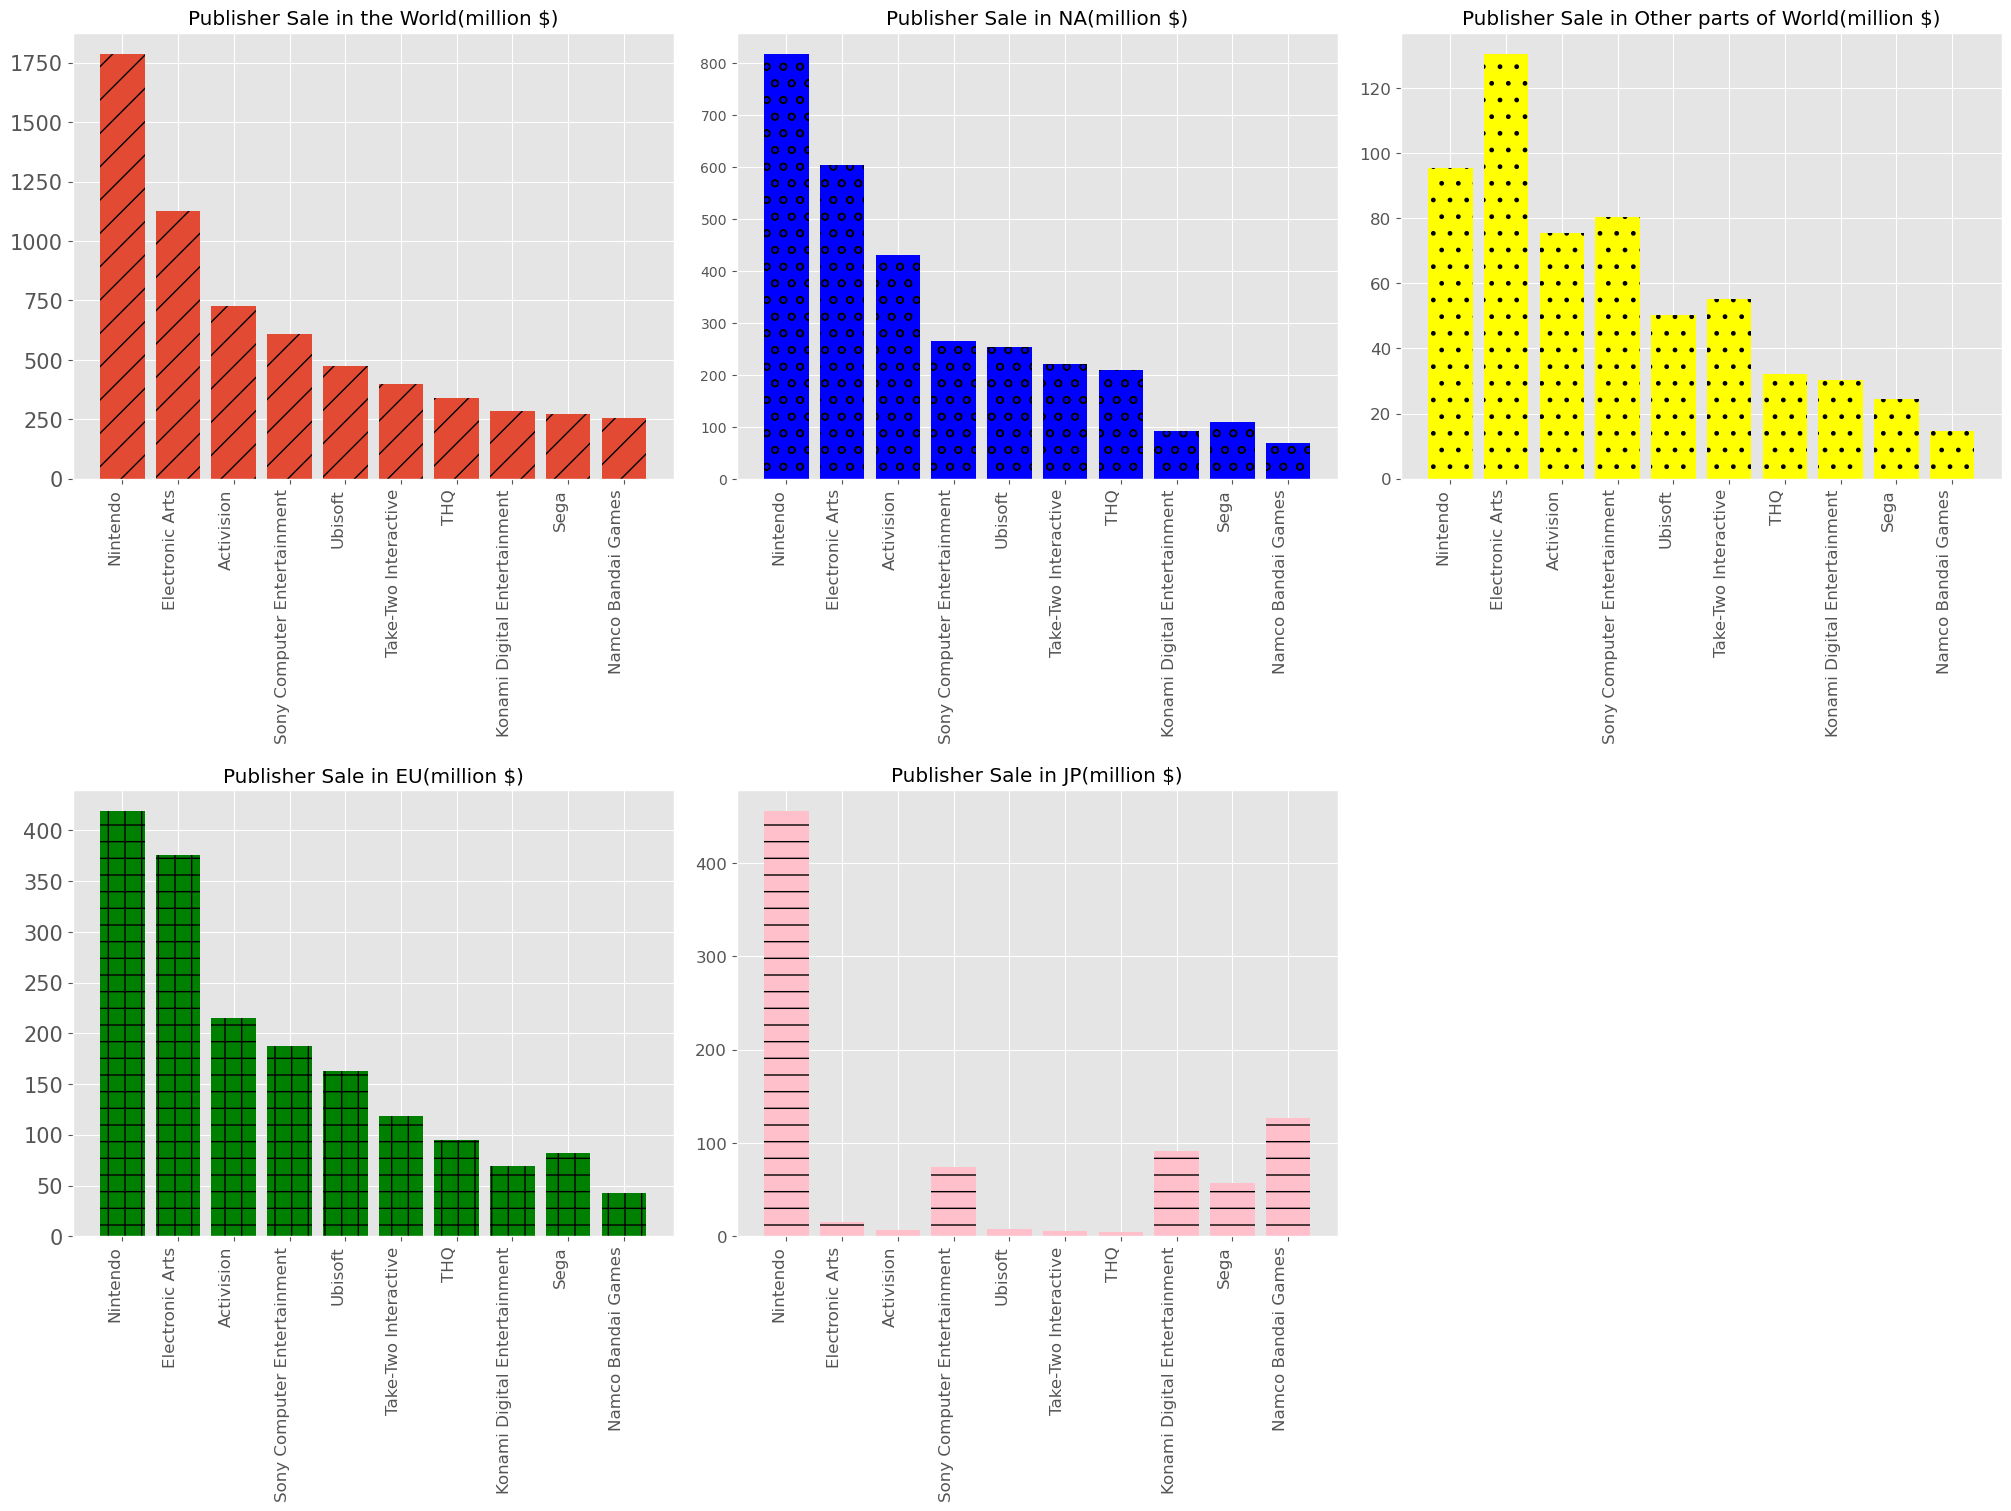

In [25]:
# Creating figure and subplots
fig, axs = plt.subplots(2, 3,figsize=(20,15),constrained_layout=True)

# Barchart of Publisher's sells globally
axs[0, 0].bar(pub_sale_highest['Publisher'],pub_sale_highest['Global_Sales'],hatch='/')
axs[0, 0].set_title('Publisher Sale in the World(million $)')
axs[0, 0].set_xticklabels(pub_sale_highest['Publisher'],rotation=90, ha='right')
axs[0, 0].tick_params(axis='x', which='major', labelsize=12)
axs[0, 0].tick_params(axis='y', which='major', labelsize=15)

# Barchart of Publisher's sells in NA
axs[0, 1].bar(pub_sale_highest['Publisher'],pub_sale_highest['NA_Sales'],hatch='o',color='Blue')
axs[0, 1].set_title('Publisher Sale in NA(million $)')
axs[0, 1].set_xticklabels(pub_sale_highest['Publisher'],rotation=90, ha='right')
axs[0, 1].tick_params(axis='x', which='major', labelsize=12)

# Barchart of Publisher's sells in the other part of the World
axs[0, 2].bar(pub_sale_highest['Publisher'],pub_sale_highest['Other_Sales'],hatch='.',color='Yellow')
axs[0, 2].set_title('Publisher Sale in Other parts of World(million $)')
axs[0, 2].set_xticklabels(pub_sale_highest['Publisher'],rotation=90, ha='right')
axs[0, 2].tick_params(axis='both', which='major', labelsize=12)

# Barchart of Publisher's sells in EU
axs[1, 0].bar(pub_sale_highest['Publisher'],pub_sale_highest['EU_Sales'],hatch='+',color='Green')
axs[1, 0].set_title('Publisher Sale in EU(million $)')
axs[1, 0].set_xticklabels(pub_sale_highest['Publisher'],rotation=90, ha='right')
axs[1, 0].tick_params(axis='x', which='major', labelsize=12)
axs[1, 0].tick_params(axis='y', which='major', labelsize=15)

# Barchart of Publisher's sells in Japan
axs[1, 1].bar(pub_sale_highest['Publisher'],pub_sale_highest['JP_Sales'],hatch='-',color='Pink')
axs[1, 1].set_title('Publisher Sale in JP(million $)')
axs[1, 1].set_xticklabels(pub_sale_highest['Publisher'],rotation=90, ha='right')
axs[1, 1].tick_params(axis='both', which='major', labelsize=12)

axs[1, 2].set_visible(False)


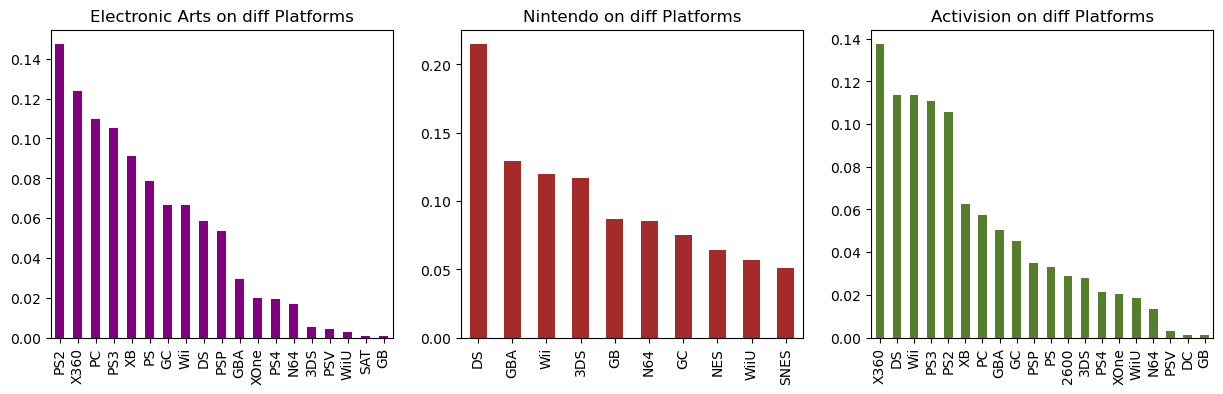

In [37]:
plt.plot
fig1 = plt.figure(figsize=(15,4))
fig.suptitle('Publishers on Different Platform', fontsize=16)

# Count of Nintendo
plt.subplot2grid((1,3),(0,1))
df.Platform[df.Publisher== 'Nintendo'].value_counts(normalize=True).plot(kind='bar',color='Brown')
plt.title('Nintendo on diff Platforms')

# Count of EA
plt.subplot2grid((1,3),(0,0))
df.Platform[df.Publisher== 'Electronic Arts'].value_counts(normalize=True).plot(kind='bar',color='Purple')
plt.title('Electronic Arts on diff Platforms')

# Count of Activision
plt.subplot2grid((1,3),(0,2))
df.Platform[df.Publisher== 'Activision'].value_counts(normalize=True).plot(kind='bar',color='#557f2d')
plt.title('Activision on diff Platforms')

plt.show()

In [27]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Global Sales of Nintendo(Highest Grossing Publisher) Overtime

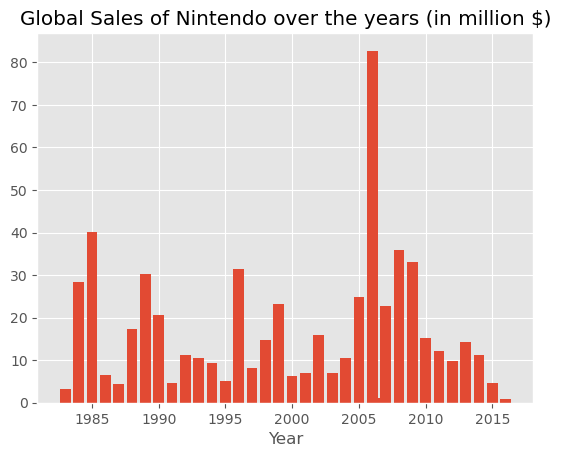

In [28]:
nintendo = df.loc[df['Publisher']=='Nintendo']

plt.bar(nintendo.Year,nintendo.Global_Sales)
plt.xlabel('Year')
plt.title('Global Sales of Nintendo over the years (in million $)')

plt.show()

## Popularity of Genres Overtime

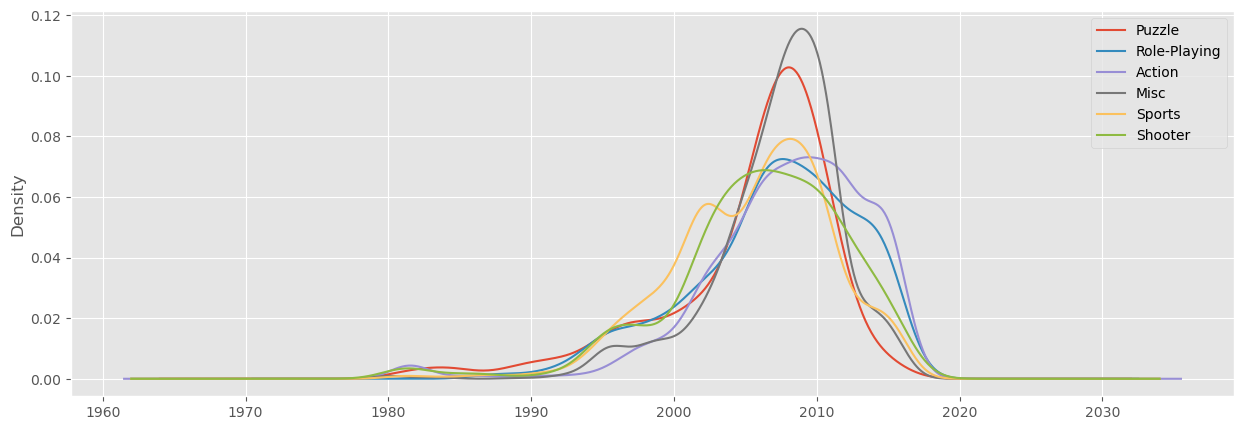

In [29]:
# Create figure
fig1 = plt.figure(figsize=(15,5))

# Kernal density Estimate
for x in ['Puzzle','Role-Playing','Action','Misc','Sports','Shooter']:
        df.Year[df.Genre==x].plot(kind='kde')
plt.legend(['Puzzle','Role-Playing','Action','Misc','Sports','Shooter'])  

plt.show()

## Percentage of each Genre

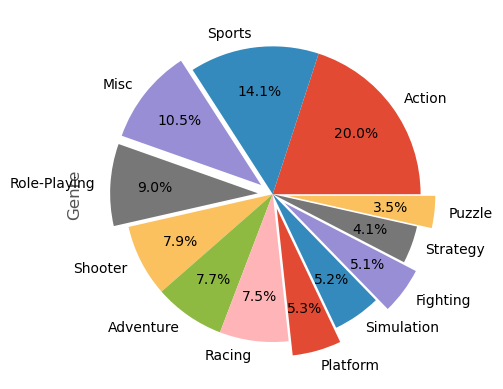

In [30]:
df['Genre'].value_counts().plot(kind='pie',autopct="%1.1f%%",explode=(0,0,0.1,0.1,0,0,0,0.1,0,0.1,0,0.1),pctdistance=0.7)

## Pie-Chart of Sales

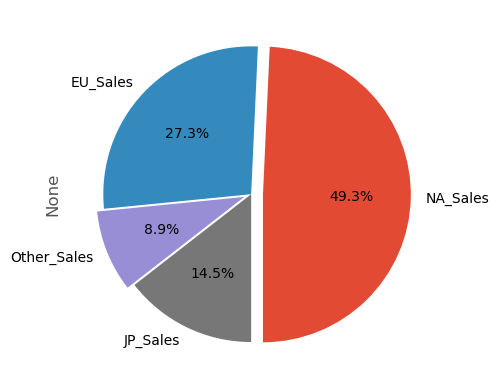

In [31]:
df[['NA_Sales','EU_Sales','Other_Sales','JP_Sales']].sum().plot(kind='pie',startangle=270,autopct='%1.1f%%',explode=(0.08,0,0.05,0))
plt.show()

## Global Sales of Games Overtime

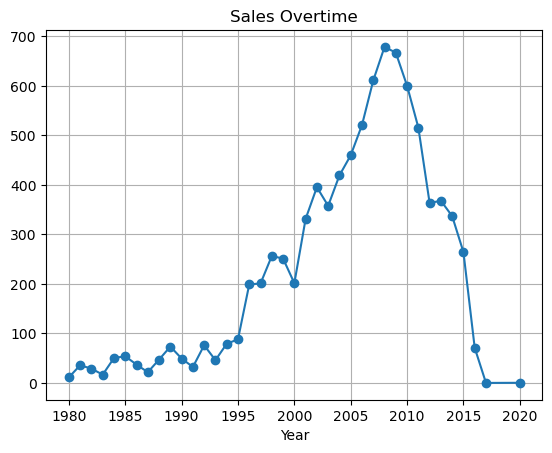

In [34]:
plt.style.use('default')

df.groupby('Year')['Global_Sales'].sum().plot(kind='line',marker='o',grid=True)
plt.title('Sales Overtime')
plt.tick_params(axis='x', which='major', labelsize=10)
plt.show()